In [13]:
#TobikoSimCheck
#Make plots to illustrate what TobikoSim is doing
#ckh Aug 2016 Calculate the worst case number of contacts for a NxN array of integer-spaced pins
#touching an interdigitated array of electrodes with thickness t and gap g in units of pin spacing.

#The array can be at any angle and any centroid relative to the electrode strips.
import numpy as np
import matplotlib.pyplot as plt #check my recent work for syntax

N=7 #number of contacts on a side
x=np.linspace(-(float(N-1))/2,(float(N-1))/2,N)
y=x #Pin x-y coordinates are integer-spaced
[X,Y]=np.meshgrid(x,y)#grids of pin coordinates

In [14]:
#define the coordinate conversions matlab has that numpy doesnt
#and make them work at least on 1-D arrays
def cart2pol(xin, yin):
    #xin and yin must be same length
    phi=np.zeros(len(xin))
    rho=np.zeros(len(xin))
    for i in range(len(xin)):
        rho[i]=np.array(np.sqrt(xin[i]**2+yin[i]**2))
        phi[i]=np.array(np.arctan2(yin[i],xin[i]))
    return(phi,rho)

def pol2cart(phiin, rhoin): #modified to work on 1D arrays
    #phiin and rhoin must be same length
    x=np.zeros(len(phiin))
    y=np.zeros(len(phiin))
    for i in range(len(phiin)):
        x[i] = np.array(rhoin[i] * np.cos(phiin[i]))
        y[i] = np.array(rhoin[i] * np.sin(phiin[i]))
    return(x, y)

In [15]:
theta=np.array([0.0*np.pi/180.0]) #in TobikoSim this is an array of possible device rotations, but here I'm just picking one angle
#thickness=np.linspace(0.1,float(N)/2,200)#thickness can range from a pin width of spacing/10, to half the array width
thickness=np.array([2.0]) #Actual thickness of my 7x7 electrodes with 4mm spacing, is 3mm. 0.75=3/4
#gap=np.linspace(0.1,float(N)/2,200)
gap=np.array([3.0]) #Actual gap of my 7x7 electrodes with 4mm spacing, is 2mm. 0.5=2/4

#now put the un-rotated, un-translated XY values into polar
Xflat=X.flatten()#now it's a 1D array so my function will work
Yflat=Y.flatten()#same
#I modified cart2pol and pol2cart to work on 1D arrays.
[TH,R]=cart2pol(Xflat,Yflat)

metric=np.zeros([len(thickness),len(gap)])# populate this array with the contact-quality metric in next few lines
#for testing it will be a 1x1 array
for idxt,t in enumerate(thickness):
    for idxg,g in enumerate(gap):
        worstcase=N**2/2#Lowest number of contacts found with either of the two nets.
        #It starts off at the best possible value.
        centroidy=np.array([(t)])#in TobikoSim this is an array but here I just pick one center Y-displacement
        for th in theta:
            [XROT,YROT]=pol2cart(TH+th,R)
            for cy in centroidy:
                YFinal=YROT+cy #final y value array
                #Whether a pin contacts depends on whether the remainder after dividing the contact spacing
                #into the pin's shifted y-value, is within t/2 of the center of the electrode.
                AContacts=np.logical_or((np.abs((YFinal+(t+g)/2)%(2*(t+g)))<t/2),(np.abs((YFinal+(t+g)/2)%(-2*(t+g)))<t/2))#Indices of contacts touching A electrodes
                BContacts=np.logical_or((np.abs((YFinal-(t+g)/2)%(2*(t+g)))<t/2),(np.abs((YFinal-(t+g)/2)%(-2*(t+g)))<t/2))#Indices of contacts touching B electrodes
                testcase=np.amin([np.sum(AContacts),np.sum(BContacts)])
                if testcase < worstcase:
                    worstcase=testcase #found a new low
        metric[idxt][idxg]=worstcase
        #Here add the latest worstcase to an array mapped to the t and g value that caused it
metric #show the result
                
        
        
    

array([[ 0.]])

In [16]:
#calculate electrode positions; electrode A y-centers are called ecA, electrode B y-centers are
#called ecB
t=thickness[0]#in this plotter program we have only one thickness
g=gap[0]
ecB=np.array([np.arange(0,float(N),2*(t+g))])+(t+g)/2
ecB=np.concatenate((ecB,-(t+g)-ecB))
ecA=-ecB

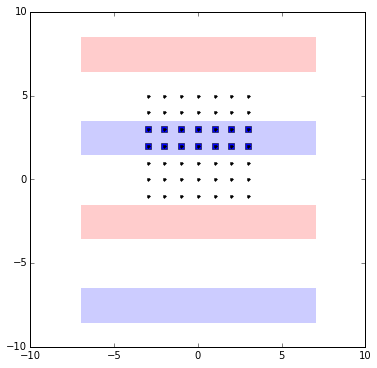

In [17]:

%matplotlib inline
#Fill the stripes of A in light gray, B in darker gray using plt.fill(Xcoords,Ycoords,color)
leftedge=-N 
rightedge=N
f=plt.figure(figsize=(6,6))
plt.hold('True')
for Bcenter in ecB:#draw B electrodes in faded blue
    plt.fill([leftedge,leftedge,rightedge,rightedge],[Bcenter-t/2,Bcenter+t/2,Bcenter+t/2,Bcenter-t/2],color='#ccccff')
for Acenter in ecA:#draw A electrodes in faded red
    plt.fill([leftedge,leftedge,rightedge,rightedge],[Acenter-t/2,Acenter+t/2,Acenter+t/2,Acenter-t/2],color='#ffcccc')
plt.plot(XROT[AContacts],YFinal[AContacts],'ro')#Circle pins touching A contacts in red
plt.plot(XROT[BContacts],YFinal[BContacts],'bs')#and put a blue square around pins touching B contacts
#Count the circles and squares: whichever number is lower should be equal to the metric for this angle and y-displacement.
plt.plot(XROT,YFinal,'k.')#Show all XY coords after rotation and translation
plt.axis('equal')
f.savefig('%dx%d_%3.1fdeg_%2.2fdispl_%2dworst.pdf'%(N,N,theta[0]*180/np.pi,centroidy[0],metric))
#plt.show() #may be needed for running in Python



In [18]:
#can I animate this? I fixed it so the borders don't change with angle and displacement

In [19]:
#pumped out a lot of example plots that get the idea across when flipped through rapidly